In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import (
    VotingClassifier,
    StackingClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
print("pandas: ", pd.__version__)
print("numpy: ", np.__version__)
print("seaborn: ", sns.__version__)
print("sklearn: ", sklearn.__version__)
print("XGboost: ", xgb.__version__)

pandas:  1.1.5
numpy:  1.18.5
seaborn:  0.11.0
sklearn:  0.23.2
XGboost:  1.3.0


<IPython.core.display.Javascript object>

# Exploratory Data Analysis

In [3]:
df = pd.read_csv("data/creditcard.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<IPython.core.display.Javascript object>

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<IPython.core.display.Javascript object>

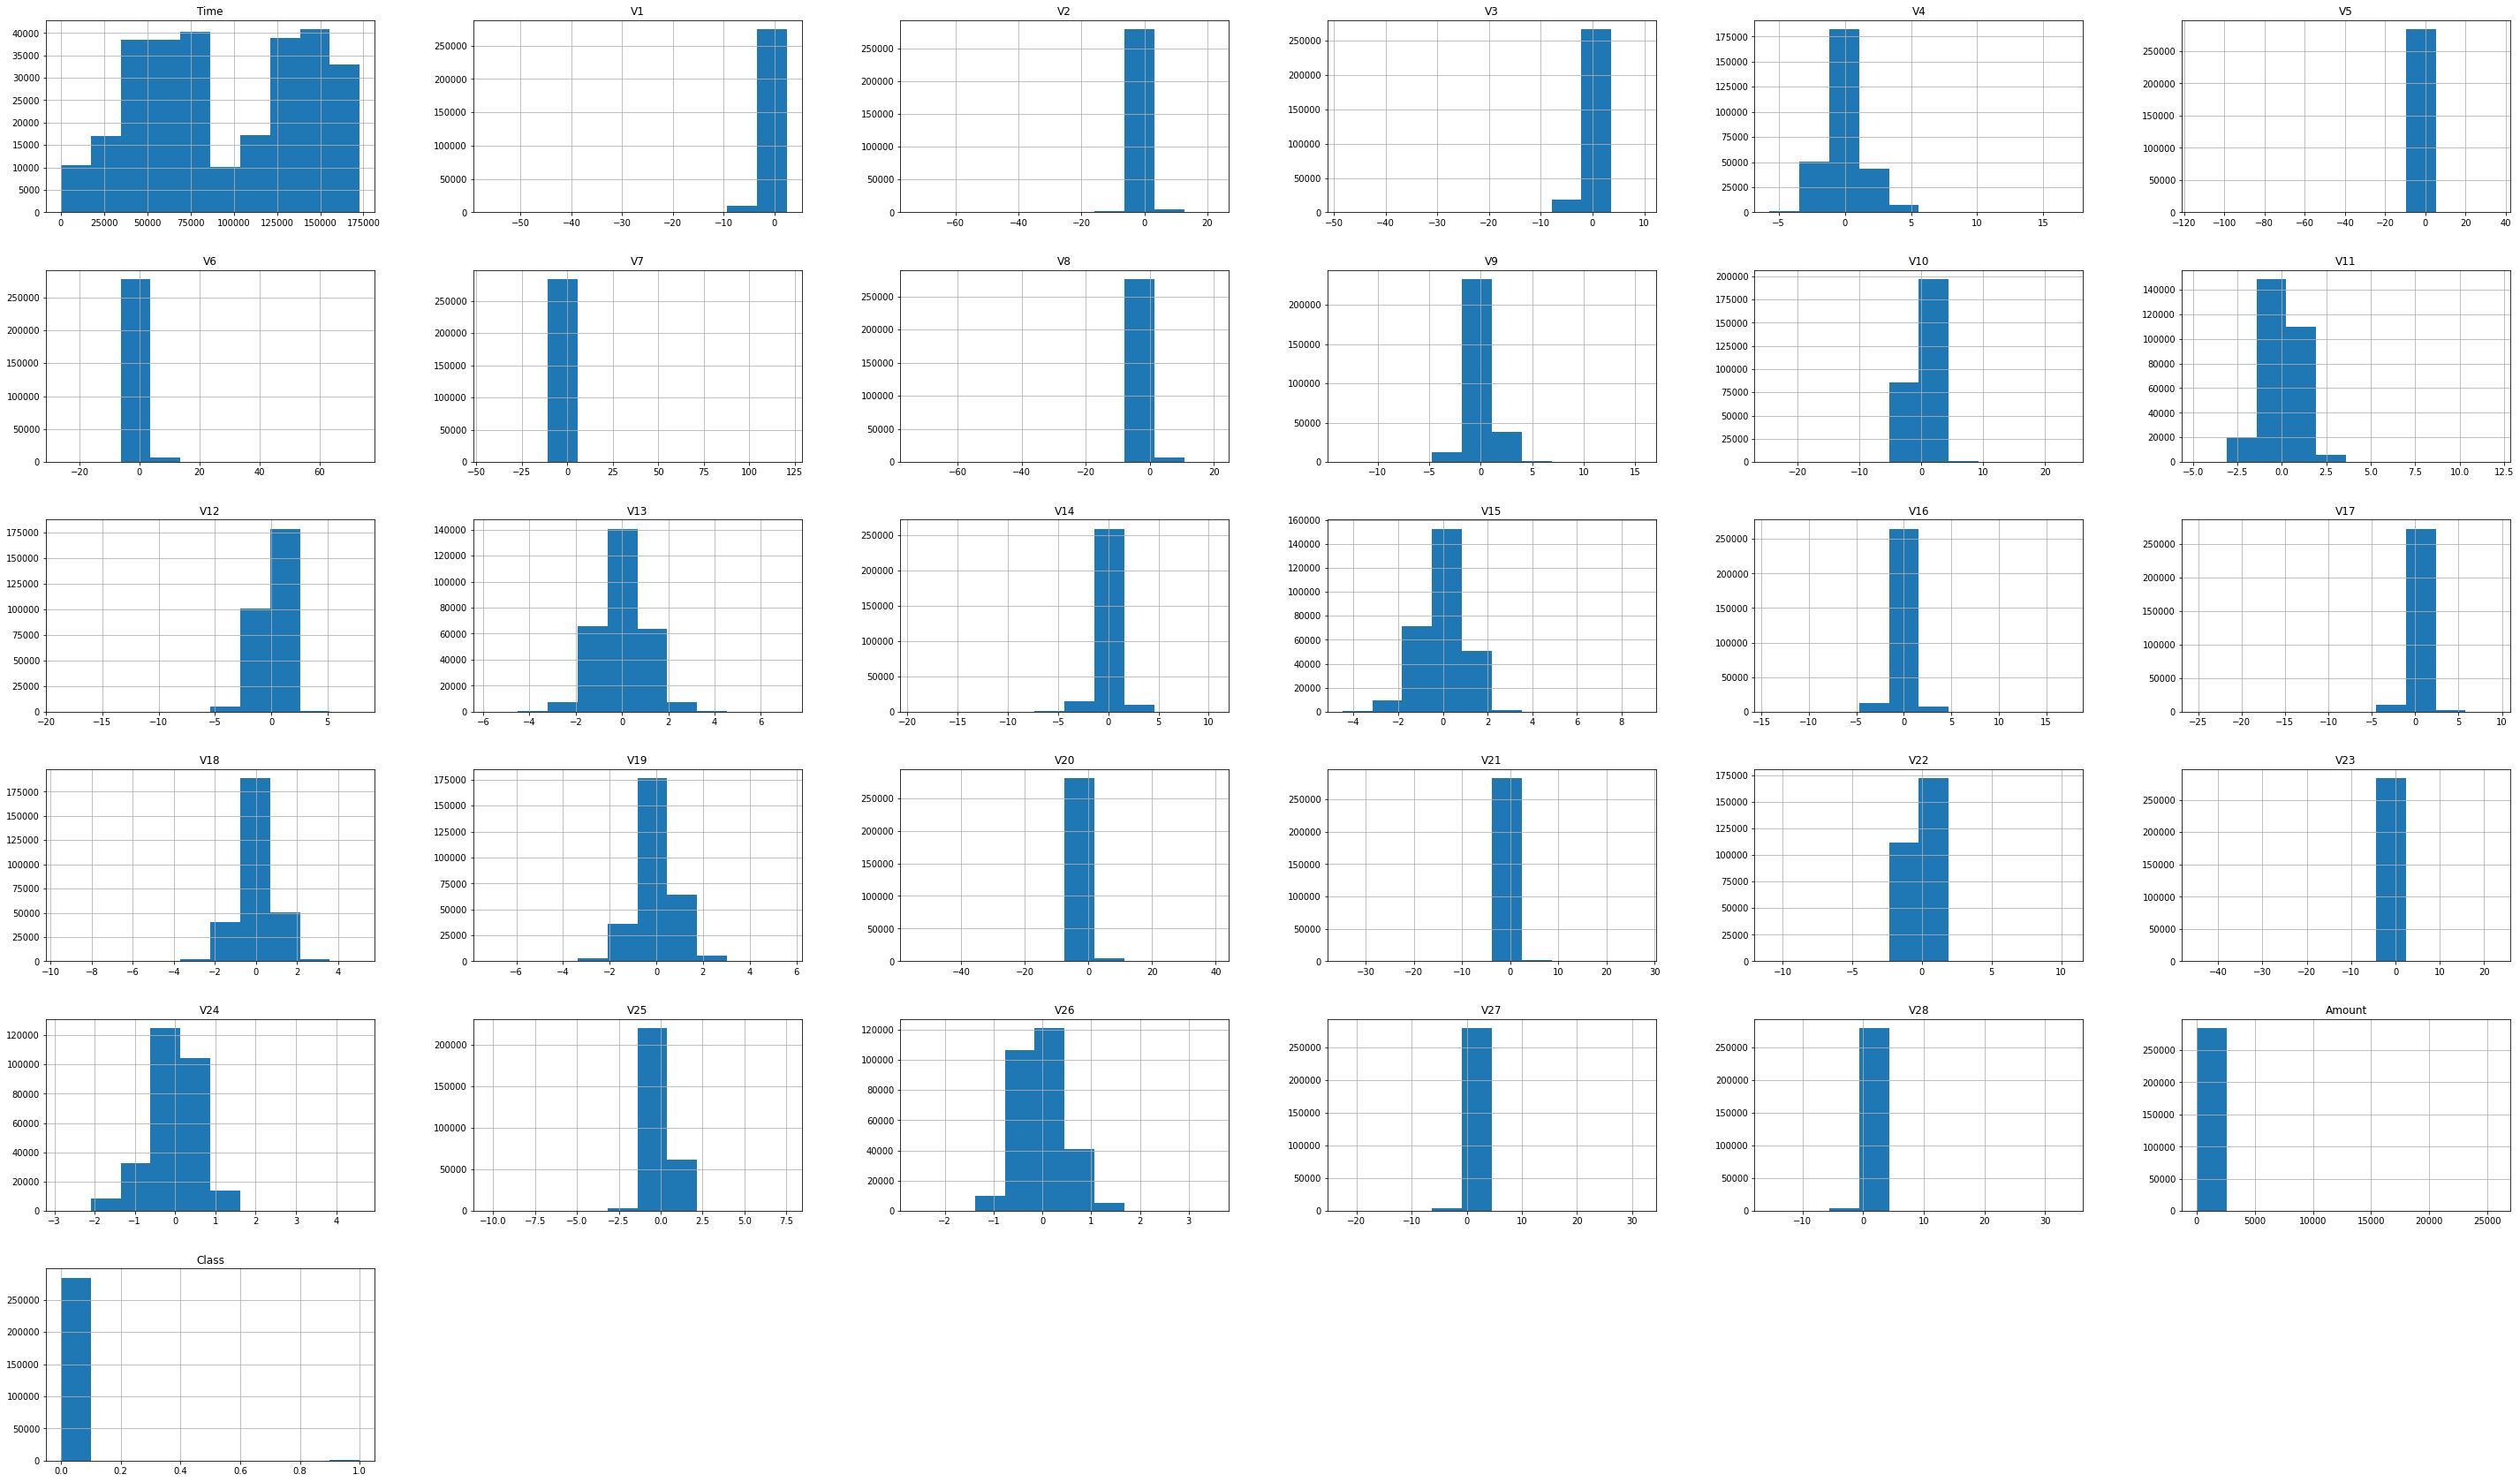

<IPython.core.display.Javascript object>

In [6]:
df.hist(figsize=(50, 30))

plt.show()

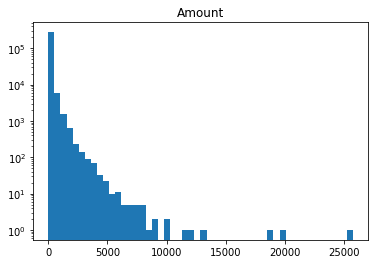

<IPython.core.display.Javascript object>

In [7]:
plt.figure()
ax = df.Amount.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Amount")

plt.show()

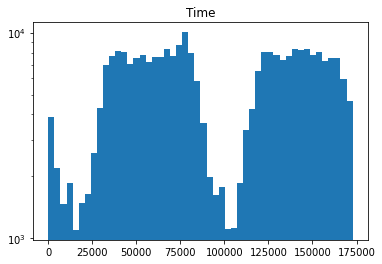

<IPython.core.display.Javascript object>

In [8]:
plt.figure()
ax = df.Time.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Time")

plt.show()

### Standardize "Amount" and "Time" columns

In [9]:
df.Amount = (df.Amount - df.Amount.min()) / df.Amount.std()
df.Time = (df.Time - df.Time.min()) / df.Time.std()

<IPython.core.display.Javascript object>

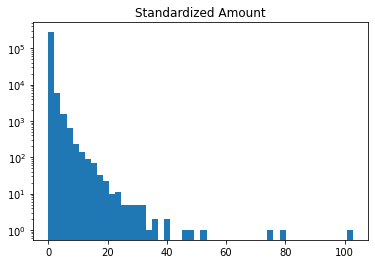

<IPython.core.display.Javascript object>

In [10]:
plt.figure()
ax = df.Amount.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Standardized Amount")

plt.show()

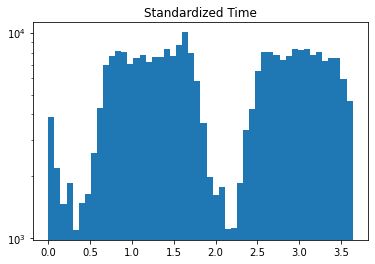

<IPython.core.display.Javascript object>

In [11]:
plt.figure()
ax = df.Time.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Standardized Time")

plt.show()

#### Correlation

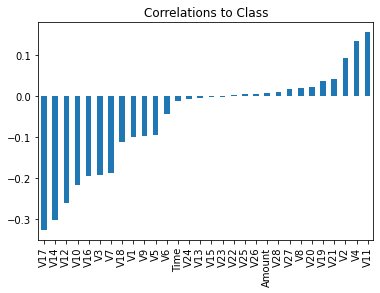

<IPython.core.display.Javascript object>

In [12]:
corr = df.corr()["Class"].drop("Class")
corr.sort_values().plot(kind="bar")
plt.title("Correlations to Class")

plt.show()

### Subsample Data

In [13]:
frauds = df[df.Class == 1]
non_frauds = df[df.Class == 0]

number_of_frauds = len(frauds)

<IPython.core.display.Javascript object>

In [14]:
balanced_data = pd.concat([frauds, non_frauds.sample(number_of_frauds)])


<IPython.core.display.Javascript object>

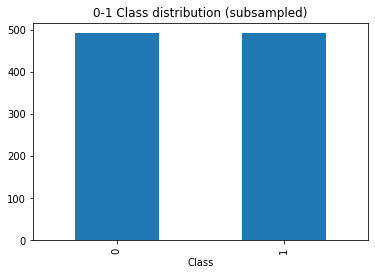

<IPython.core.display.Javascript object>

In [15]:
plt.figure()
balanced_data.groupby("Class").V1.count().plot(kind="bar")
plt.title("0-1 Class distribution (subsampled)")

plt.show()

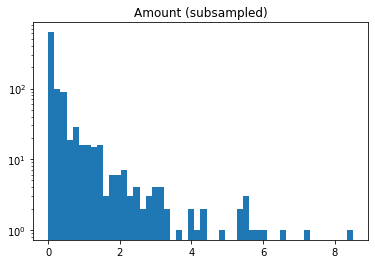

<IPython.core.display.Javascript object>

In [16]:
plt.figure()
ax = balanced_data.Amount.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Amount (subsampled)")

plt.show()

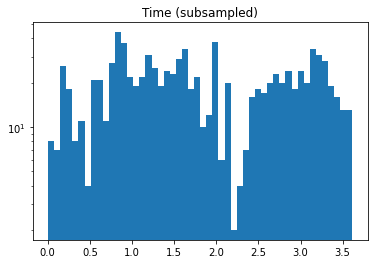

<IPython.core.display.Javascript object>

In [17]:
plt.figure()
ax = balanced_data.Time.hist(grid=False, bins=50)
ax.set_yscale("log", nonposy="clip")
plt.title("Time (subsampled)")

plt.show()

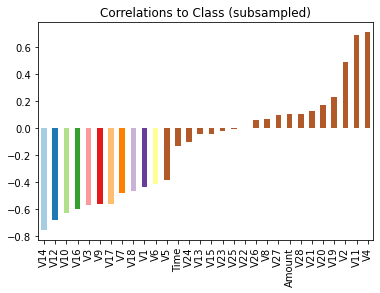

<IPython.core.display.Javascript object>

In [18]:
corr = balanced_data.corr()["Class"].drop("Class")
corr.sort_values().plot(kind="bar", color=plt.cm.Paired(np.arange(len(df.columns))))
plt.title("Correlations to Class (subsampled)")

plt.show()

#### Split Data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

# Create Baseline Models

#### Train DecisionTreeClassifier, LogisticRegression, GaussianNB

In [20]:
baseline_classifiers = [
    ("DecisionTree", DecisionTreeClassifier(max_depth=6)),
    ("LR", LogisticRegression()),
    ("NB", GaussianNB()),
]

<IPython.core.display.Javascript object>

In [21]:
for baseline_classifier in baseline_classifiers:

    model = baseline_classifier[1]
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    print(
        "Classification report for ",
        baseline_classifier[0],
        "\n",
        classification_report(y_test, predictions),
    )

Classification report for  DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.88      0.81      0.84       134

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for  LR 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.89      0.66      0.76       134

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for  NB 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85309
           1       0.06      0.85      0.11       134

    accuracy                           0.98     85443
   macro avg       0.5

<IPython.core.display.Javascript object>

## Feature Selection

#### Select feature with higher correlation to "Class"

In [22]:
corr = df.corr()["Class"]

<IPython.core.display.Javascript object>

In [23]:
selected_features = list(corr[abs(corr) > 0.1].index)

<IPython.core.display.Javascript object>

In [24]:
df_selected_features = df[selected_features]

<IPython.core.display.Javascript object>

#### Split Data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

## Create Baseline Models

#### Train DecisionTreeClassifier, LogisticRegression, GaussianNB

In [26]:
baseline_classifiers = [
    ("DecisionTree", DecisionTreeClassifier(max_depth=6)),
    ("LR", LogisticRegression()),
    ("NB", GaussianNB()),
]

<IPython.core.display.Javascript object>

In [27]:
for baseline_classifier in baseline_classifiers:

    model = baseline_classifier[1]
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    print(
        "Classification report for ",
        baseline_classifier[0],
        "\n",
        classification_report(y_test, predictions),
    )

Classification report for  DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.89      0.81      0.85       134

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for  LR 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.88      0.63      0.73       134

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for  NB 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85309
           1       0.12      0.88      0.21       134

    accuracy                           0.99     85443
   macro avg       0.5

<IPython.core.display.Javascript object>

# Ensemble VotingClassifier

In [28]:
ensemble = VotingClassifier(baseline_classifiers)

<IPython.core.display.Javascript object>

### Train on Full Dataset

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [30]:
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=6)),
                             ('LR', LogisticRegression()),
                             ('NB', GaussianNB())])

<IPython.core.display.Javascript object>

In [31]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.86      0.83      0.84       134

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [33]:
ensemble = VotingClassifier(baseline_classifiers)

<IPython.core.display.Javascript object>

In [34]:
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=6)),
                             ('LR', LogisticRegression()),
                             ('NB', GaussianNB())])

<IPython.core.display.Javascript object>

In [35]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.85      0.83      0.84       134

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# Stacking classifier

In [36]:
# Use LogisticRegression as the top level learner
ensemble = StackingClassifier(
    estimators=baseline_classifiers, final_estimator=LogisticRegression()
)

<IPython.core.display.Javascript object>

### Train on Full Dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [38]:
ensemble.fit(x_train, y_train)

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(max_depth=6)),
                               ('LR', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

<IPython.core.display.Javascript object>

In [39]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.91      0.78      0.84       134

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [41]:
# Use LogisticRegression as the top level learner
ensemble = StackingClassifier(
    estimators=baseline_classifiers, final_estimator=LogisticRegression()
)

<IPython.core.display.Javascript object>

In [42]:
ensemble.fit(x_train, y_train)

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(max_depth=6)),
                               ('LR', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

<IPython.core.display.Javascript object>

In [43]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.90      0.78      0.84       134

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# Bagging Classifier

### Train on Full Dataset

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [45]:
ensemble = BaggingClassifier(
    n_estimators=10, base_estimator=DecisionTreeClassifier(max_depth=5)
)

<IPython.core.display.Javascript object>

In [46]:
ensemble.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

<IPython.core.display.Javascript object>

In [47]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.92      0.81      0.86       134

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [49]:
ensemble = BaggingClassifier(
    n_estimators=10, base_estimator=DecisionTreeClassifier(max_depth=5)
)

<IPython.core.display.Javascript object>

In [50]:
ensemble.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

<IPython.core.display.Javascript object>

In [51]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.90      0.80      0.85       134

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# Boosting Classifier

### Train on Full Dataset

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [53]:
ensemble = AdaBoostClassifier(n_estimators=80, learning_rate=1.3)

<IPython.core.display.Javascript object>

In [54]:
ensemble.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1.3, n_estimators=80)

<IPython.core.display.Javascript object>

In [55]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.86      0.76      0.81       134

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [57]:
ensemble = AdaBoostClassifier(n_estimators=80, learning_rate=1.3)

<IPython.core.display.Javascript object>

In [58]:
ensemble.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1.3, n_estimators=80)

<IPython.core.display.Javascript object>

In [59]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.84      0.76      0.80       134

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# XGBoost Classifier

### Train on Full Dataset

In [60]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [61]:
ensemble = xgb.XGBClassifier(max_depth=5, n_jobs=-1)

<IPython.core.display.Javascript object>

In [62]:
ensemble.fit(x_train, y_train)

[18:16:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [63]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.94      0.81      0.87       134

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [65]:
ensemble = xgb.XGBClassifier(max_depth=5, n_jobs=-1)

<IPython.core.display.Javascript object>

In [66]:
ensemble.fit(x_train, y_train)

[18:16:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [67]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.94      0.78      0.85       134

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# Random Forest Classifier

### Train on Full Dataset

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1).values, df.Class.values, test_size=0.3, random_state=2
)

<IPython.core.display.Javascript object>

In [69]:
ensemble = RandomForestClassifier(criterion="entropy", n_jobs=-1)

<IPython.core.display.Javascript object>

In [70]:
ensemble.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

<IPython.core.display.Javascript object>

In [71]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.93      0.80      0.86       134

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

### Train on filtered Dataset

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
    df_selected_features.drop("Class", axis=1).values,
    df_selected_features.Class.values,
    test_size=0.3,
    random_state=2,
)

<IPython.core.display.Javascript object>

In [73]:
ensemble = RandomForestClassifier(criterion="entropy", n_jobs=-1)

<IPython.core.display.Javascript object>

In [74]:
ensemble.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

<IPython.core.display.Javascript object>

In [75]:
print(
    "Classification report Ensemble learner:\n",
    classification_report(y_test, ensemble.predict(x_test)),
)

Classification report Ensemble learner:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.92      0.81      0.87       134

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<IPython.core.display.Javascript object>

# Comparative Analysis of all Ensemble methods

In [76]:
df_comparison = pd.DataFrame(columns=["F1", "Precision", "Recall"])

<IPython.core.display.Javascript object>

In [77]:
base_classifiers = [
    ("DecisionTree", DecisionTreeClassifier(max_depth=6)),
    ("LR", LogisticRegression()),
    ("NaiveBayes", GaussianNB()),
]

<IPython.core.display.Javascript object>

In [78]:
classifiers = base_classifiers[:]

<IPython.core.display.Javascript object>

In [79]:
classifiers

[('DecisionTree', DecisionTreeClassifier(max_depth=6)),
 ('LR', LogisticRegression()),
 ('NaiveBayes', GaussianNB())]

<IPython.core.display.Javascript object>

In [80]:
classifiers.extend([("Voting", VotingClassifier(base_classifiers)), 
                    ("Stacking", StackingClassifier(
    estimators=base_classifiers, final_estimator=LogisticRegression()
)),
                       ("AdaBoost", AdaBoostClassifier(n_estimators=80, learning_rate=1.3)),
    ("XGB", xgb.XGBClassifier(max_depth=5, n_jobs=-1)),
    ("RF", RandomForestClassifier(criterion="entropy", n_jobs=-1))])


<IPython.core.display.Javascript object>

In [81]:
classifiers

[('DecisionTree', DecisionTreeClassifier(max_depth=6)),
 ('LR', LogisticRegression()),
 ('NaiveBayes', GaussianNB()),
 ('Voting',
  VotingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(max_depth=6)),
                               ('LR', LogisticRegression()),
                               ('NaiveBayes', GaussianNB())])),
 ('Stacking',
  StackingClassifier(estimators=[('DecisionTree',
                                  DecisionTreeClassifier(max_depth=6)),
                                 ('LR', LogisticRegression()),
                                 ('NaiveBayes', GaussianNB())],
                     final_estimator=LogisticRegression())),
 ('AdaBoost', AdaBoostClassifier(learning_rate=1.3, n_estimators=80)),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=N

<IPython.core.display.Javascript object>

In [82]:
def learner(model, data: pd.DataFrame)->(float, float, float):
    '''
    Helper function to train on different datasets and model
    
    Returns:
    Tuple(F1 Score, Precision, Recall)
    '''
    
    x_train, x_test, y_train, y_test = train_test_split(
    data.drop("Class", axis=1).values, data.Class.values, test_size=0.3, random_state=2
)

    model.fit(x_train, y_train)

    predictions = model.predict(x_test)


    return f1_score(y_test, predictions),precision_score(y_test, predictions), recall_score(y_test, predictions),


<IPython.core.display.Javascript object>

In [83]:
for classifier in classifiers:

    # Full Dataset
    model = classifier[1]
    f1, precision, recall = learner(model, df)

    print(
        "Score for full dataset for ",
        classifier[0],
        f1,
        precision,
        recall,
    )

    result = pd.Series(
        {"F1": f1, "Precision": precision, "Recall": recall},
        name=f"{classifier[0]}-full",
    )
    df_comparison = df_comparison.append(result)

    # Filtered Dataset
    model = classifier[1]
    f1, precision, recall = learner(model, df_selected_features)

    print(
        "Score for Filtered dataset for ",
        classifier[0],
        f1,
        precision,
        recall,
    )

    result = pd.Series(
        {"F1": f1, "Precision": precision, "Recall": recall},
        name=f"{classifier[0]}-filtered",
    )
    df_comparison = df_comparison.append(result)

    print("\n")

Score for full dataset for  DecisionTree 0.8416988416988417 0.872 0.8134328358208955
Score for Filtered dataset for  DecisionTree 0.8366533864541833 0.8974358974358975 0.7835820895522388


Score for full dataset for  LR 0.7606837606837609 0.89 0.664179104477612
Score for Filtered dataset for  LR 0.7304347826086957 0.875 0.6268656716417911


Score for full dataset for  NaiveBayes 0.1074964639321075 0.05737292400603926 0.8507462686567164
Score for Filtered dataset for  NaiveBayes 0.2103386809269162 0.1194331983805668 0.8805970149253731


Score for full dataset for  Voting 0.8345864661654135 0.8409090909090909 0.8283582089552238
Score for Filtered dataset for  Voting 0.8275862068965518 0.8503937007874016 0.8059701492537313


Score for full dataset for  Stacking 0.8433734939759036 0.9130434782608695 0.7835820895522388
Score for Filtered dataset for  Stacking 0.8340080971659919 0.911504424778761 0.7686567164179104


Score for full dataset for  AdaBoost 0.8095238095238095 0.864406779661017 0

<IPython.core.display.Javascript object>

## Comparison

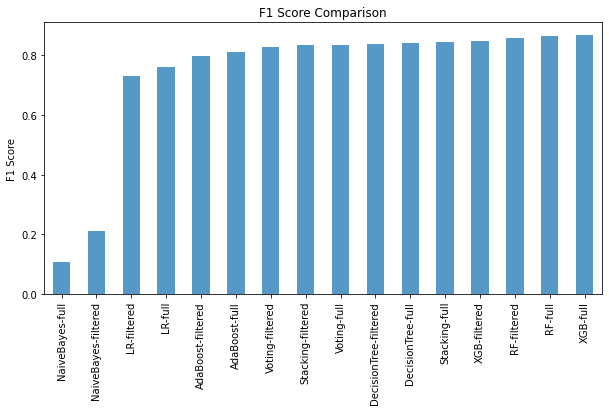

<IPython.core.display.Javascript object>

In [84]:
df_comparison.F1.sort_values().plot(kind="bar", figsize=(10, 5), alpha=0.75)

plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()

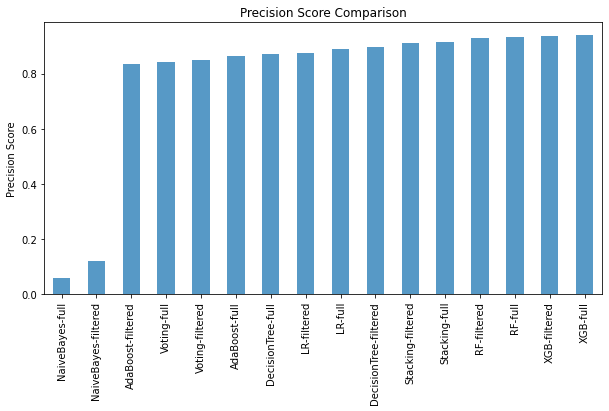

<IPython.core.display.Javascript object>

In [85]:
df_comparison.Precision.sort_values().plot(kind="bar", figsize=(10, 5), alpha=0.75)

plt.title("Precision Score Comparison")
plt.ylabel("Precision Score")
plt.show()

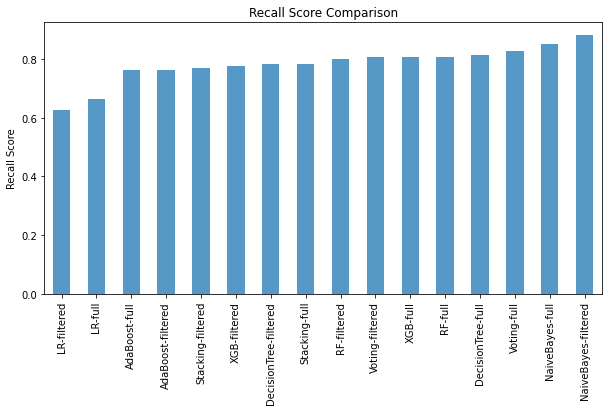

<IPython.core.display.Javascript object>

In [86]:
df_comparison.Recall.sort_values().plot(kind="bar", figsize=(10, 5), alpha=0.75)

plt.title("Recall Score Comparison")
plt.ylabel("Recall Score")
plt.show()